# Getting started

- Python basiscs
- Loading data
- Plotting data

## Python basics

For a data scientist learning some basic data structures available in python is very important for efficient usage of the tools available in the python ecosystem. 

### Variables

Variables can be defined using any alphanumeric string which starts with an alphabet or "\_". It can include "\_" in it. 

In [1]:
a = 10
b = 20
c = "Hello"

print a, b, c

10 20 Hello


### Lists

A list is a data structure which can hold a list of items of different types. Think of a shopping list. Items in the list can be accessed using zero based index. You will use these when you want to add more data and access the data based on the position in index.

In [2]:
list_items = ["milk", "cereal", "banana", 22.5, [1,2,3]]  ## A list can contain another list and items of different types
print list_items
print "3rd item in the list: ", list_items[2] # Zero based index starts from 0 so 3rd item will have index 2

['milk', 'cereal', 'banana', 22.5, [1, 2, 3]]
3rd item in the list:  banana


### Sets

Like list but only store unique items which are hashable (think basic data types like string, ints and not lists, will explain later). Super useful for checking if an item is already in the list. Items are not indexed. So items can only be added or removed. You will use these when you want to keep track of unique items e.g. feature names in the data.

In [3]:
set_items = set([1,2,3])
print set_items
print "Is 1 in set_items: ", 1 in set_items
print "Is 10 in set_items: ", 10 in set_items

set([1, 2, 3])
Is 1 in set_items:  True
Is 10 in set_items:  False


### Dictionaries 

Like sets but can also map values to each unique item. Essentially, it stores key-value pairs which are useful for fast lookup of items. Think of telephone directory or shopping catalogue. Keys should be of same time as items in sets, but values can be anything. You will use these when you want to keep unique items and their related values e.g. words in the data and the number of times they occur.

In [4]:
item_details = {
    "milk": {
        "brand": "Amul",
        "quantity": 2.5,
        "cost": 10
    },
    "chocolate": {
        "brand": "Cadbury",
        "quantity": 1,
        "cost": 5
    },
}

print item_details
print "What are is the brand of milk: ", item_details["milk"]["brand"]
print "What are is the cost of chocolate: ", item_details["chocolate"]["cost"]

{'milk': {'brand': 'Amul', 'cost': 10, 'quantity': 2.5}, 'chocolate': {'brand': 'Cadbury', 'cost': 5, 'quantity': 1}}
What are is the brand of milk:  Amul
What are is the cost of chocolate:  5


### Functions

Using a function is handy in cases when you need to repeat something over an over again. A function can take arguments and return some variables. 

E.g. if you want to fetch tweets using different queries then you can define a function which takes the query and gives you as output the tweets on that query. You can then just call the function with different queries rather than rewriting the whole code for getting the queries.

In [5]:
def get_items_from_file(filename):
    data = []
    with open(filename) as fp:
        for line in fp:
            line = line.strip().split(" ")
            data.append(line)
    return data

In [6]:
print "Data in file data/temp1.txt"
print get_items_from_file("../data/temp1.txt")

Data in file data/temp1.txt
[['milk', '5'], ['chocolate', '10'], ['honey', '20']]


In [7]:
print "Data in file data/temp2.txt"
print get_items_from_file("../data/temp2.txt")

Data in file data/temp2.txt
[['Alex', '222-222-1212', 'Ohio'], ['Shubh', '111-221-3452', 'Illinois'], ['Carlos', '445-123-1231', 'Washington']]


## Loading Data

In [8]:
from scipy.io import arff

In [9]:
data, meta = arff.loadarff("../data/iris.arff")

In [10]:
data.shape, meta

((150,), Dataset: iris
 	sepallength's type is numeric
 	sepalwidth's type is numeric
 	petallength's type is numeric
 	petalwidth's type is numeric
 	class's type is nominal, range is ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'))

In [11]:
data[0]

(5.1, 3.5, 1.4, 0.2, 'Iris-setosa')

### Pandas

Pandas is a wonderful library for working with tabular data in python. It can read csv files easily and represents them as dataframes. Think of it like excel but faster and without a GUI. 

In [12]:
import pandas as pd

In [13]:
df_iris = pd.DataFrame(data, columns=meta.names())
df_iris.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
print "The shape of iris data is: ", df_iris.shape

The shape of iris data is:  (150, 5)


In [15]:
print "Show how many instances are of each class: "
df_iris["class"].value_counts()

Show how many instances are of each class: 


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [16]:
df_iris["sepallength"].hist(bins=10)

**Filtering data** 
Filtering parts of the data in pandas is really easy. 
If you want to filter data for editing it then you need to make a copy of the filtered data.

In [17]:
print "Show data containing with petalwidth > 2.0"
df_iris[df_iris.petalwidth > 2.0]

Show data containing with petalwidth > 2.0


,sepallength,sepalwidth,petallength,petalwidth,class
100,6.3,3.3,6.0,2.5,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica
105,7.6,3.0,6.6,2.1,Iris-virginica
109,7.2,3.6,6.1,2.5,Iris-virginica
112,6.8,3.0,5.5,2.1,Iris-virginica
114,5.8,2.8,5.1,2.4,Iris-virginica
115,6.4,3.2,5.3,2.3,Iris-virginica
117,7.7,3.8,6.7,2.2,Iris-virginica
118,7.7,2.6,6.9,2.3,Iris-virginica


### Titanic data

```
VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.
```

In [18]:
df = pd.read_csv("../data/titanic.csv")

In [19]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Plotting data

Great for visual inspection.

### Matplotlib and Seaborn

Matplotlib is a low level python library which gives you complete control over your plots. 
Seaborn is a library made on top of matplotlib and which adds functionality to create certain types of plots easily. Works great with pandas. 

In [20]:
# We need the line below to show plots directly in the notebook.
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
sns.set_style("ticks")
sns.set_context("paper")

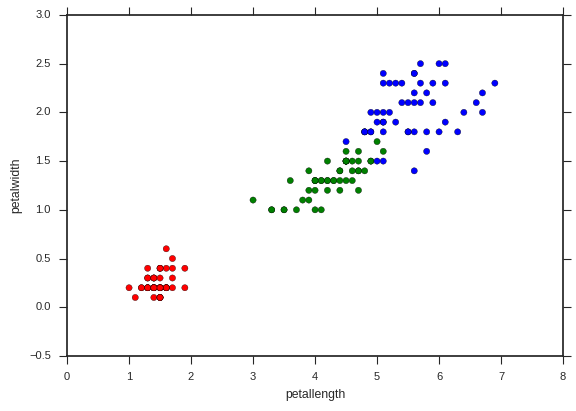

In [22]:
colors = {
    "Iris-setosa": "red",
    "Iris-versicolor": "green",
    "Iris-virginica": "blue",
}
plt.scatter(df_iris.petallength, df_iris.petalwidth, c=map(lambda x: colors[x], df_iris["class"]))
plt.xlabel("petallength")
plt.ylabel("petalwidth")

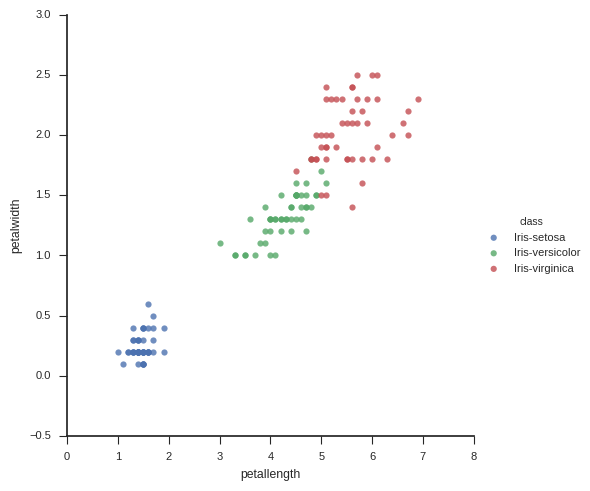

In [23]:
sns.lmplot(x="petallength", y="petalwidth", hue="class", data=df_iris, fit_reg=False)

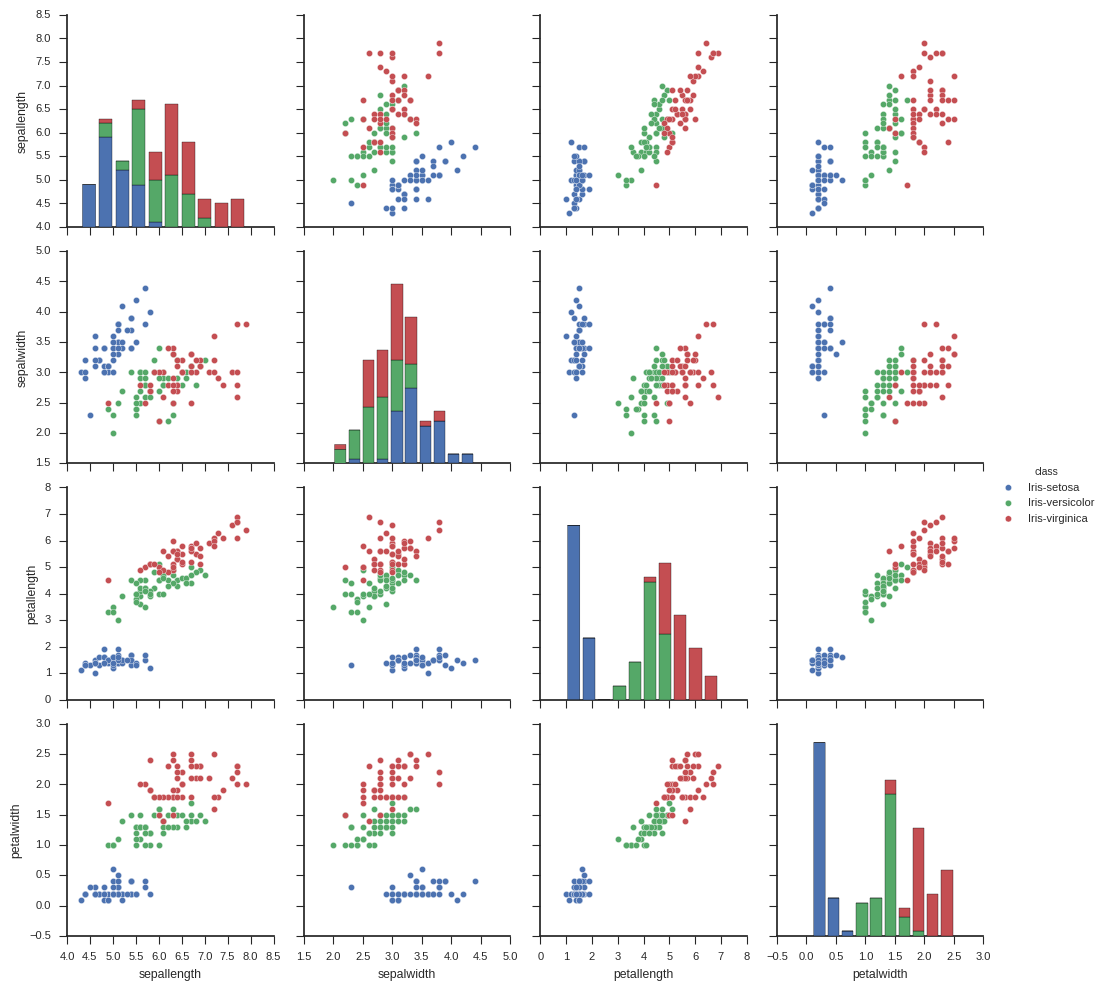

In [24]:
sns.pairplot(df_iris, hue="class")

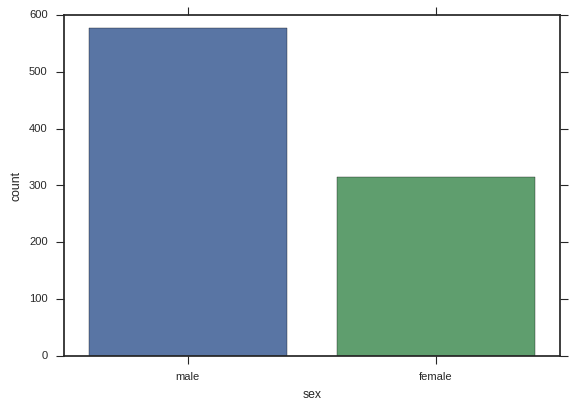

In [25]:
sns.countplot(x="sex", data=df)

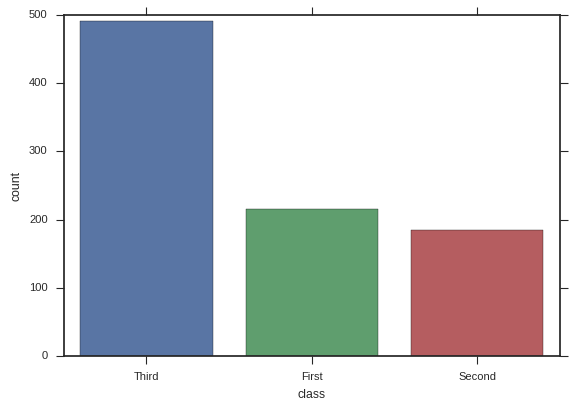

In [26]:
sns.countplot(x="class", data=df)

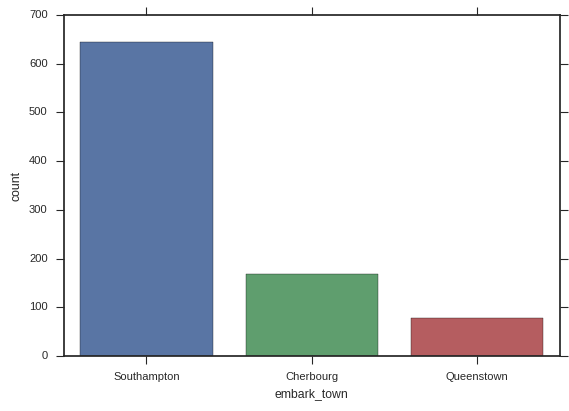

In [27]:
sns.countplot(x="embark_town", data=df)

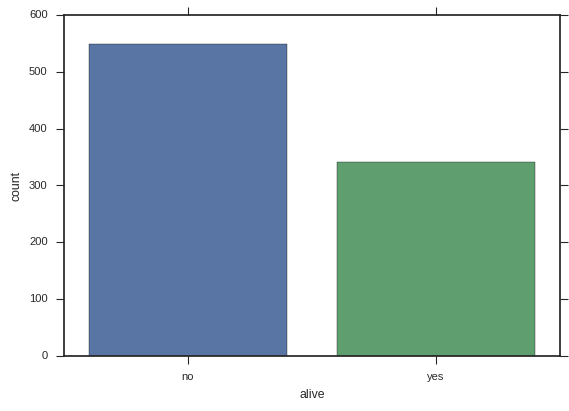

In [28]:
sns.countplot(x="alive", data=df)

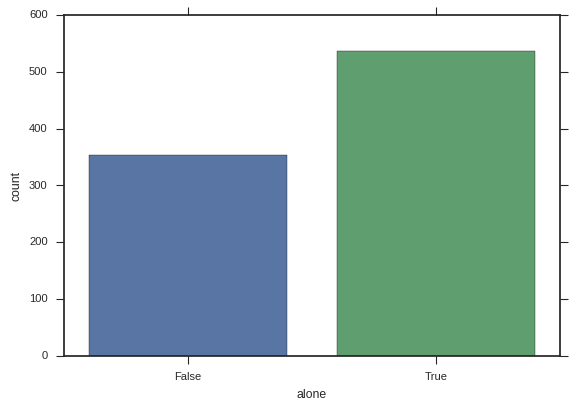

In [29]:
sns.countplot(x="alone", data=df)

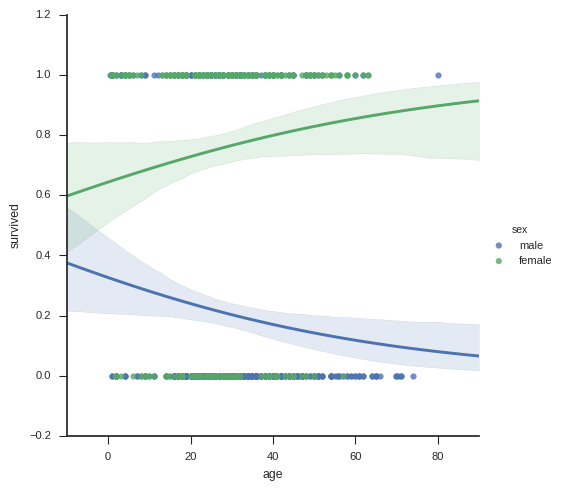

In [30]:
sns.lmplot(x="age", y="survived", hue="sex", data=df, fit_reg=True, logistic=True)

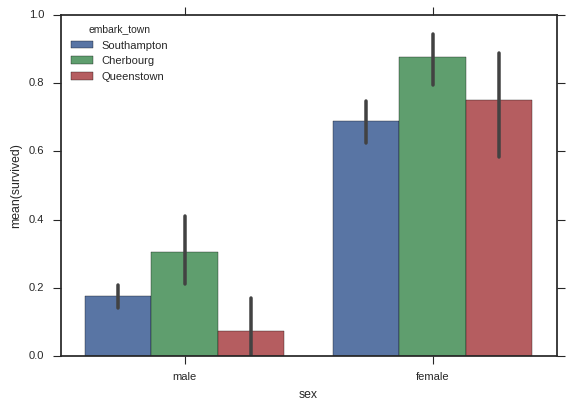

In [31]:
sns.barplot(x="sex", y="survived", hue="embark_town", data=df)

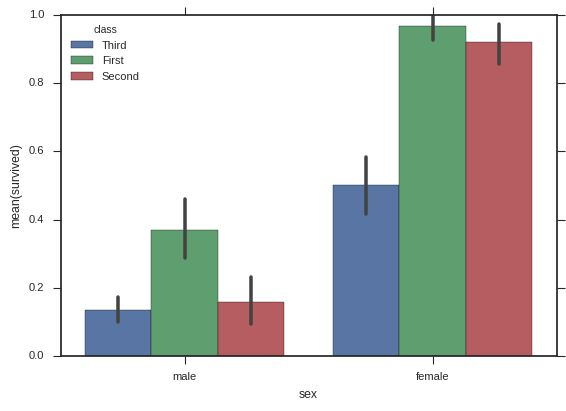

In [32]:
sns.barplot(x="sex", y="survived", hue="class", data=df)

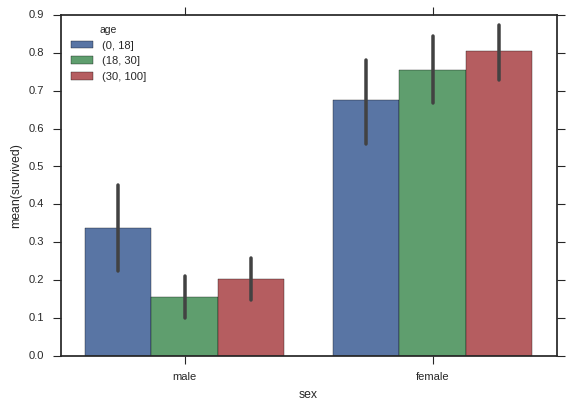

In [33]:
sns.barplot(x="sex", y="survived", hue=pd.cut(df.age, bins=[0,18,30,100]), data=df)

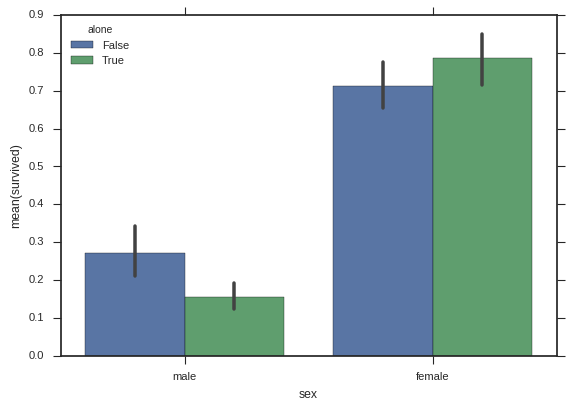

In [34]:
sns.barplot(x="sex", y="survived", hue="alone", data=df)

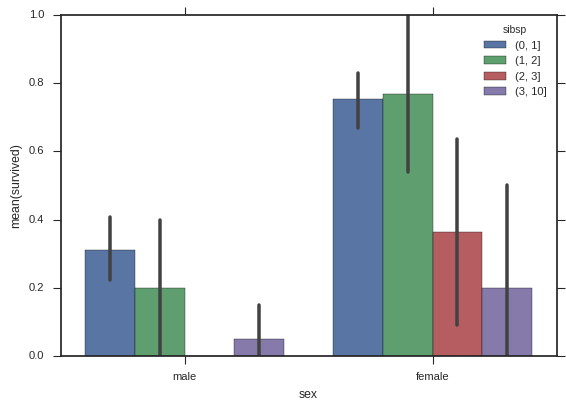

In [35]:
sns.barplot(x="sex", y="survived", hue=pd.cut(df.sibsp, bins=[0,1,2,3,10]), data=df)

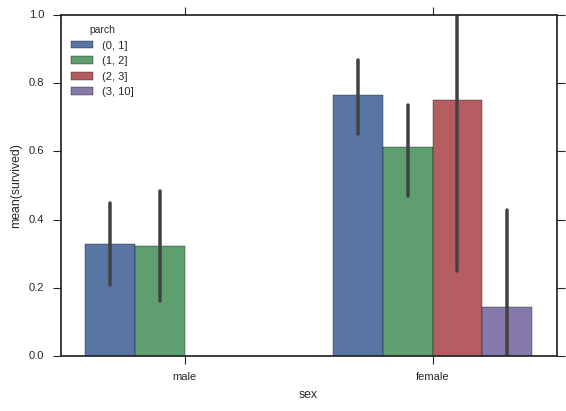

In [36]:
sns.barplot(x="sex", y="survived", hue=pd.cut(df.parch, bins=[0,1,2,3,10]), data=df)

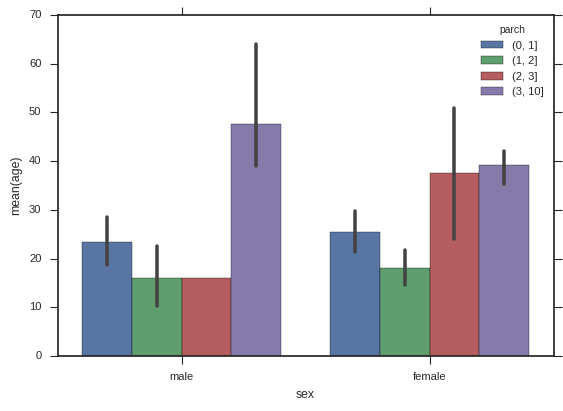

In [37]:
sns.barplot(x="sex", y="age", hue=pd.cut(df.parch, bins=[0,1,2,3,10]), data=df)

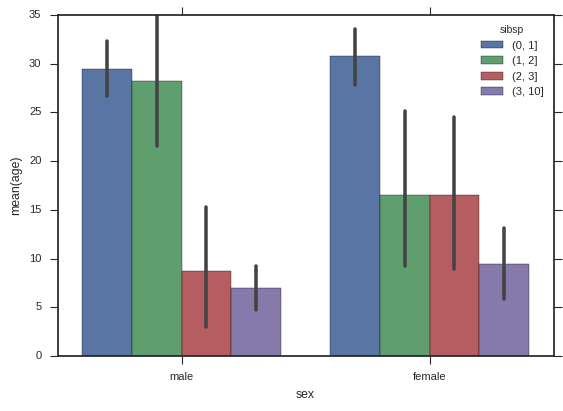

In [38]:
sns.barplot(x="sex", y="age", hue=pd.cut(df.sibsp, bins=[0,1,2,3,10]), data=df)

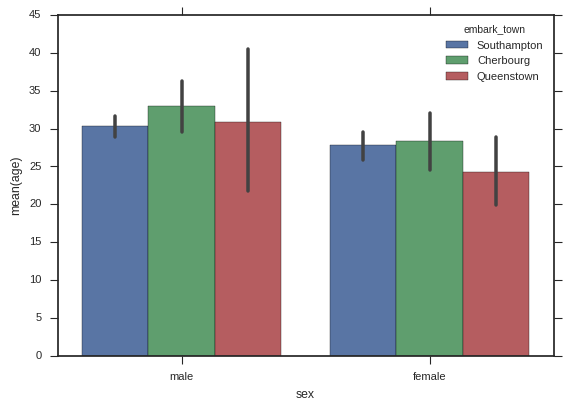

In [39]:
sns.barplot(x="sex", y="age", hue="embark_town", data=df)

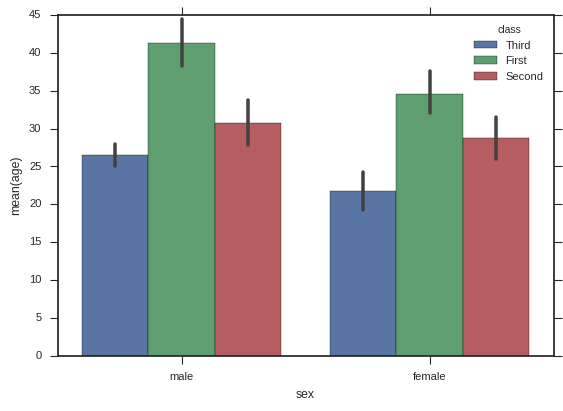

In [40]:
sns.barplot(x="sex", y="age", hue="class", data=df)

### Question: Draw the plot of mean petalwidth of the various categories of Iris-classes. It should show the mean petalwidth for each petallengths in buckets [0, 2.5, 4.5, 6.5, 10]

```
ANSWER BELOW
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
```

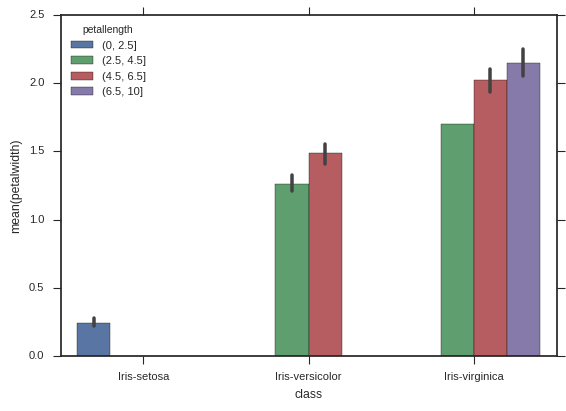

In [41]:
sns.barplot(x="class", y="petalwidth", hue=pd.cut(df_iris.petallength, bins=[0, 2.5, 4.5, 6.5, 10]), data=df_iris)